In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['MEDV'] = boston_dataset.target

In [7]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

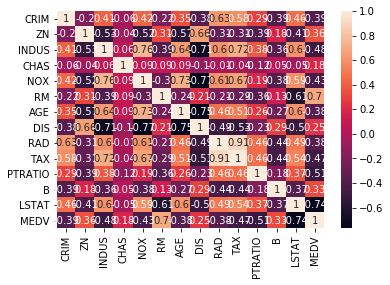

In [9]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

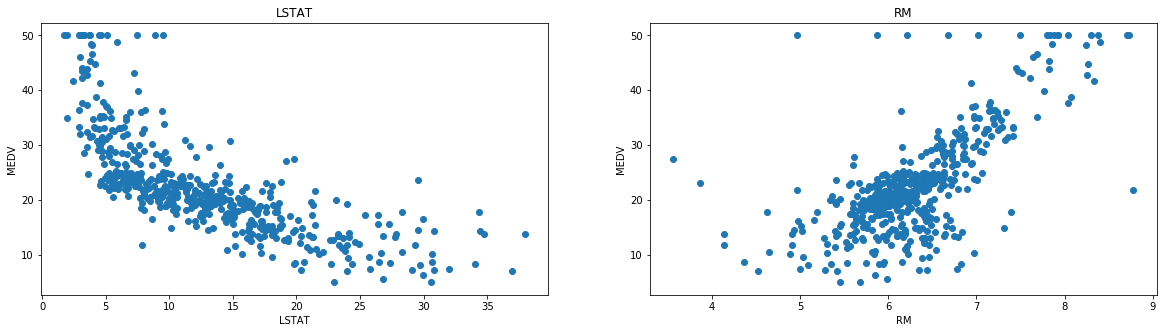

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(253, 2)
(253, 2)
(253,)
(253,)


## Lineaarinen regressio

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.471476336906222
R2 score is 0.6475751987411287


The model performance for testing set
--------------------------------------
RMSE is 5.5931794649535576
R2 score is 0.6264234348863683


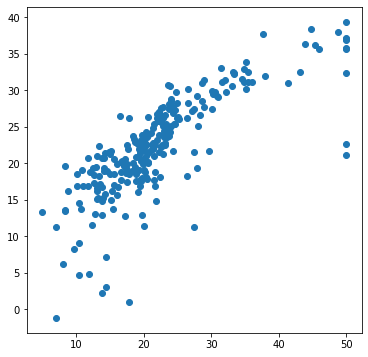

In [15]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_test_predict)
plt.show()

## Ridge

In [16]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
print(ridge_model.coef_)

[-0.5947273   5.30799584]


In [18]:
# model evaluation for testing set
y_test_predict = ridge_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.591351973796683
R2 score is 0.6266675165722633


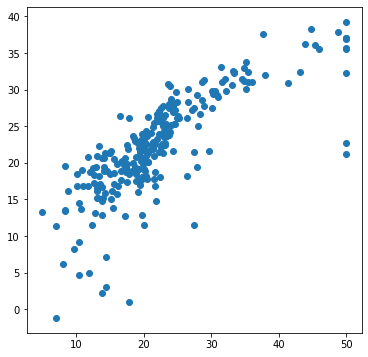

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_test_predict)
plt.show()

## Lasso

In [20]:
from sklearn import linear_model

lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
print(lasso_model.coef_)

[-0.6072575   5.06971552]


In [22]:
# model evaluation for testing set
y_test_predict = lasso_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.587970899680711
R2 score is 0.6271188861724513


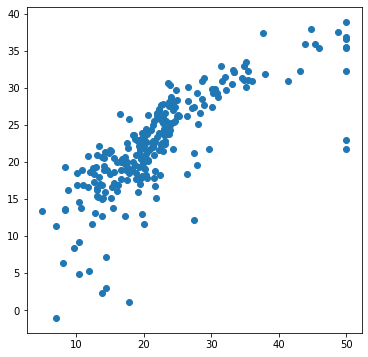

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_test_predict)
plt.show()

## ElasticNet

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

elastic_model = ElasticNet(random_state=0)
elastic_model.fit(X_train, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
print(elastic_model.coef_)

[-0.80699327  1.493976  ]


In [26]:
# model evaluation for testing set
y_test_predict = elastic_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.899733419403671
R2 score is 0.5843508540842113


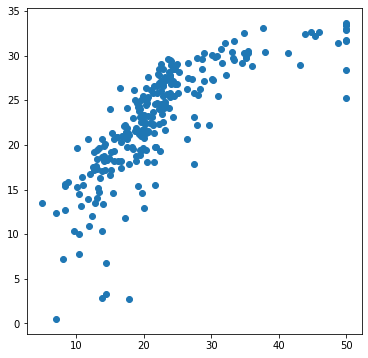

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_test_predict)
plt.show()

In [28]:
print("Linear: ", lin_model.coef_)
print("Ridge: ", ridge_model.coef_)
print("Lasso: ", lasso_model.coef_)
print("ElasticNet: ", elastic_model.coef_)

Linear:  [-0.59070617  5.37581167]
Ridge:  [-0.5947273   5.30799584]
Lasso:  [-0.6072575   5.06971552]
ElasticNet:  [-0.80699327  1.493976  ]


In [29]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(253, 2)
(253, 2)
(253,)
(253,)


## Polynominen regression

3.9213763937427935
0.5966976756934224


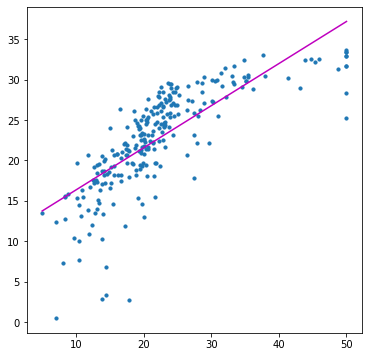

In [30]:
import operator

from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
#x = 2 - 3 * np.random.normal(0, 1, 20)
#y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x=Y_test
y=y_test_predict

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=1)
polynomial_features_quadratic = PolynomialFeatures(degree=2)
polynomial_features_cubic = PolynomialFeatures(degree=3)

x_poly = polynomial_features.fit_transform(x)
x_quad = polynomial_features_quadratic.fit_transform(x)
x_cubic = polynomial_features_cubic.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.figure(figsize=(6,6))

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

In [31]:
model.fit(x_quad, y)
y_poly_pred_quad = model.predict(x_quad)

In [32]:
model.fit(x_cubic, y)
y_poly_pred_cubic = model.predict(x_cubic)

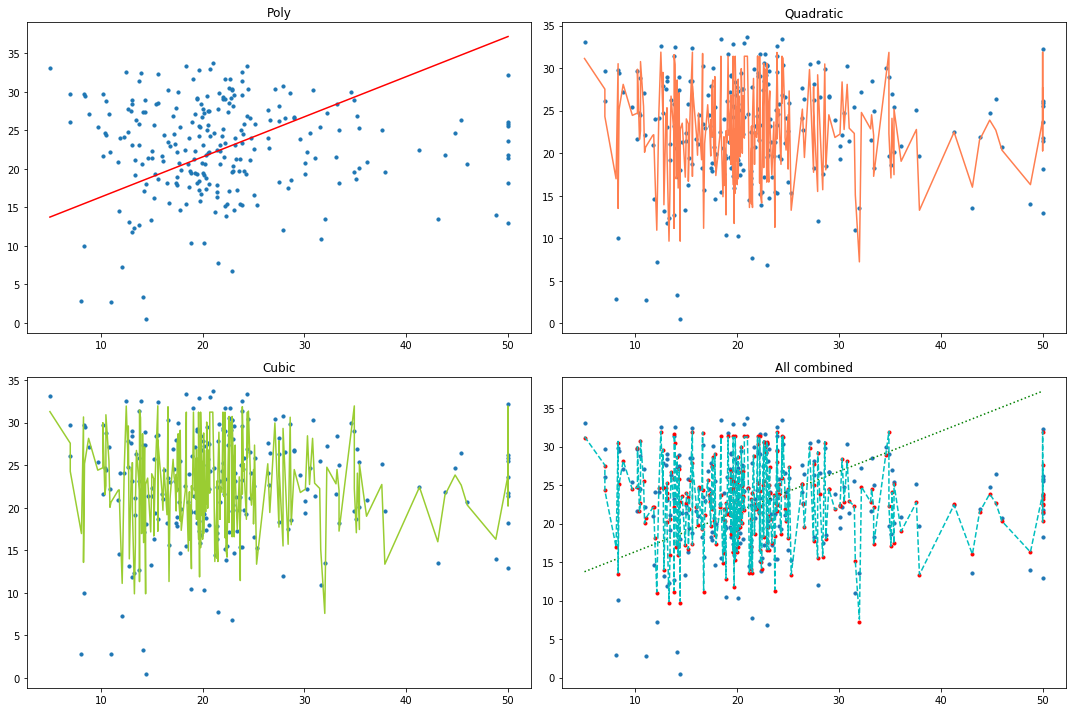

In [33]:
width=5
height=5
rows = 2
cols = 2
axes=[]
fig=plt.figure(figsize=(15,10))

y1=y_poly_pred
y2=y_poly_pred_quad
y3=y_poly_pred_cubic

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    #subplot_title=("Subplot "+str(a))
    #axes[-1].set_title(subplot_title)

axes[0].set_title("Poly")
axes[1].set_title("Quadratic")
axes[2].set_title("Cubic")
axes[3].set_title("All combined")

axes[0].scatter(x, y, s=10)
axes[1].scatter(x, y, s=10)
axes[2].scatter(x, y, s=10)
axes[3].scatter(x, y, s=10)

axes[0].plot(x, y1, 'red')
axes[1].plot(x, y2, 'coral')
axes[2].plot(x, y3, 'yellowgreen')
axes[3].plot(x, y1,'g:', x, y2, 'r.', x, y3, 'c--')
fig.tight_layout()    
plt.show()

## Polynominen regression datasettiin

In [53]:
from sklearn.preprocessing import PolynomialFeatures


"Creates a polynomial regression model for the given degree"
  
poly_features = PolynomialFeatures(degree=2)
  
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
  
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
  
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.574971140883415
R2 score of training set is 0.7536037291547869


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.73898387418108
R2 score of test set is 0.7318161770104674


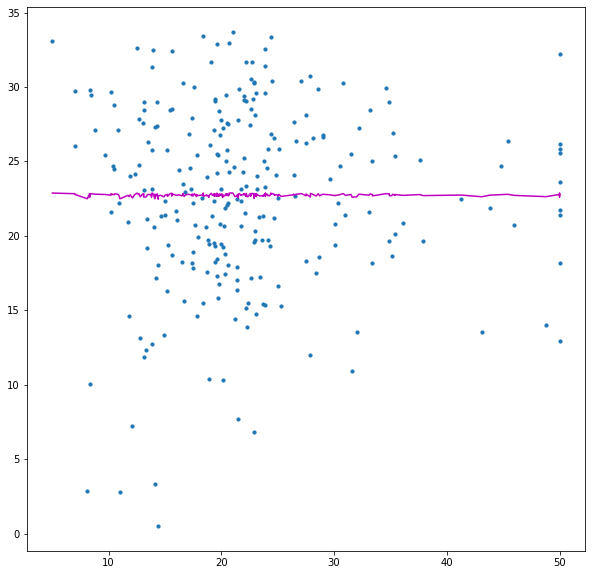

In [74]:
#poly_model = LinearRegression()
#poly_model.fit(x, y)

plt.figure(figsize=(10,10))

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, poly_model.predict(y), color='m')